<h1>Week 4 - Logistic Regression</h1>

The data set I am using is the Gapminder data set. A series of observational variables that have independent sources that have been centralised into one set.

I am investigating the association between incomeperperson and armedforcesrate. The association, or hypothesis, I am expecting is for higher incomeperperson there will be a lower armedforcesrate. So my coefficient to my explanetory variable should be less than 0. I will also be looking at the type of government, the polityscore variable, and seeing if that has a confounding effect.

For the purposes of checking a logistic regression model I am going to shift my question around. I will look at how incomeperperson and armedforcesrate (as explanetory variables) can be used to predict the nature of the polityscore (the response variable). My hypothesis is that there <u>is an association</u> between polityscore_recoded and armedforcesrate.

<h3>SET UP</h3>

<i>Read in the packages and set appropriate options</i>

In [168]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
%matplotlib inline

In [169]:
pd.set_option('display.float_format', '{:,.2f}'.format)

<i>Read in the data set</i>

In [170]:
gap_data = pd.read_csv('../gapminder.csv', usecols = ['incomeperperson', 'armedforcesrate', \
                                                      'polityscore', 'country'], index_col='country')

<i>Replace the spaces with blanks and coerce into numeric and categorical</i>

In [171]:
gap_data.loc[:,'incomeperperson'] = pd.to_numeric(gap_data['incomeperperson'].replace(' ',''))
gap_data.loc[:,'armedforcesrate'] = pd.to_numeric(gap_data['armedforcesrate'].replace(' ',''))
gap_data.loc[:,'polityscore'] = pd.to_numeric(gap_data['polityscore'].replace(' ',''))

<i>Remove any rows where there are any nulls</i>

In [172]:
gap_data = gap_data[~gap_data.isnull().any(axis = 1)]

<i>Convert the polityscore variable to categorical, as it is categorical data</i>

In [173]:
gap_data.loc[:,'polityscore'] = gap_data.loc[:,'polityscore'].astype('int').astype('category')

<h2>Data preparation for this assignment:</h2>

<i>My response variable has more than two levels, I will recode so that a 'negative', < 10, value is coded 0, and a 'neutral or 'positive', >= 0, value is coded to 1.</i>

In [174]:
dict_map = {}
for val in range(-10,11):
    if val < 0:
        dict_map[val] = 0
    else:
        dict_map[val] = 1

In [175]:
gap_data.loc[:,'polityscore_recoded'] = gap_data.loc[:,'polityscore'].map(dict_map)

<i>Looking at the head I can see that the mapping is working correctly.</i>

In [176]:
gap_data[['polityscore','polityscore_recoded']].head()

,polityscore,polityscore_recoded
country,,
Albania,9,1
Algeria,2,1
Angola,-2,0
Argentina,8,1
Armenia,5,1


<i>I will centralise my explanetory variables as they are quantitative.</i>

In [177]:
gap_data.loc[:,'armedforcesrate'] = gap_data.loc[:,'armedforcesrate'] - gap_data.loc[:,'armedforcesrate'].mean()
gap_data.loc[:,'incomeperperson'] = gap_data.loc[:,'incomeperperson'] - gap_data.loc[:,'incomeperperson'].mean()

<h2>The assignment:</h2>

<b>STEP 1</b>

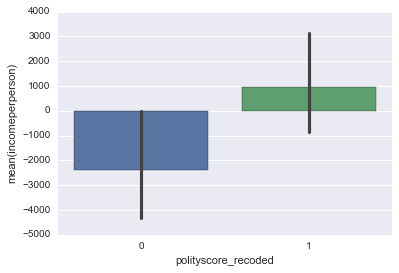

In [178]:
seaborn.barplot(x = 'polityscore_recoded', y = 'incomeperperson', data = gap_data)

In [179]:
log_model = smf.logit('polityscore_recoded ~ incomeperperson', data = gap_data).fit()
print('\np-value intercept :', log_model.pvalues[0])
print('p-value incomeperperson :', log_model.pvalues[1])

Optimization terminated successfully.
         Current function value: 0.581439
         Iterations 6

p-value intercept : 2.65708403161e-07
p-value incomeperperson : 0.072024363519


The p-value for the association between polityscore_recoded and incomeperperson is > 0.05 so is not statistically significant.

This also means that lower polityscore indicates much lower average incomeperperson than higher or neutral polityscores. So that means that countries with more volatile governments, on average, have much lower average income per person.

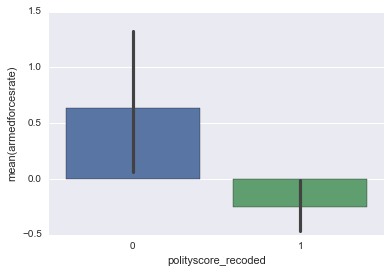

In [180]:
seaborn.barplot(x = 'polityscore_recoded', y = 'armedforcesrate', data = gap_data)

In [181]:
log_model = smf.logit('polityscore_recoded ~ armedforcesrate', data = gap_data).fit()
print('\np-value intercept :', log_model.pvalues[0])
print('p-value armedforcesrate :', log_model.pvalues[1])

Optimization terminated successfully.
         Current function value: 0.563532
         Iterations 5

p-value intercept : 2.88622494987e-07
p-value armedforcesrate : 0.00439590548634


The p-value , < 0.05, indicates that there is an association between polityscore_recoded and armedforcesrate.

This also represents that countries with lower polityscores have much higher average armedforcesrate. So that means countries with more volatile governments have higher proportions of the population employeed in the army.

In [182]:
log_model = smf.logit('polityscore_recoded ~ armedforcesrate + incomeperperson', data = gap_data).fit()
print('\np-value intercept :',log_model.pvalues[0])
print('p-value armedforcesrate :', log_model.pvalues[1])
print('p-value incomeperperson :', log_model.pvalues[2])

Optimization terminated successfully.
         Current function value: 0.546393
         Iterations 6

p-value intercept : 2.67633215052e-07
p-value armedforcesrate : 0.00304111919927
p-value incomeperperson : 0.0466311405313


It is good to check for confounding. Given that the number of people you can afford to employ in the army out of the total population is instinctively linked to the income of the country, we would expect confounding between the armedforcesrate and incomeperperson variables.

By adding the incomeperperson variable along side the armedforcesrate we see that the p-values for both are now < 0.05, which means that both explanetory variables are statistically significant in this model. The changes in p-values for both explanetory variables indicates they were confounding each other.

<i>SUMMARY</i>

In [183]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     polityscore_recoded   No. Observations:                  149
Model:                           Logit   Df Residuals:                      146
Method:                            MLE   Df Model:                            2
Date:                 Wed, 14 Dec 2016   Pseudo R-squ.:                 0.08126
Time:                         14:43:53   Log-Likelihood:                -81.413
converged:                        True   LL-Null:                       -88.613
                                         LLR p-value:                 0.0007461
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.0299      0.200      5.145      0.000         0.638     1.422
armedforcesrate    -0.3937      0.133     -2.964      0.003        -0.654    -0.133
incomeperperson  5.362e-05    2.7e-05      1.990      0.047         8e-07     0.000
===================================================================================
"""

In [184]:
pd.set_option('display.float_format', '{:,.10f}'.format)
log_summary = log_model.conf_int()
log_summary['OR'] = log_model.params
log_summary.columns = ['Lower Conf. Int.', 'Upper Conf. Int.', 'Odds Ratio']
log_summary = np.exp(log_summary)
log_summary

,Lower Conf. Int.,Upper Conf. Int.,Odds Ratio
Intercept,1.8918349772,4.1463022606,2.8007355539
armedforcesrate,0.5198885398,0.8751700394,0.6745301134
incomeperperson,1.0000007997,1.0001064526,1.0000536248


In [185]:
pd.set_option('display.float_format', '{:,.2f}'.format)

The armedforcesrate vairable has an odds ratio 0.675 which is less than 1, the confidence interval for the odds ratio also shows the value is most likely less than 1. This indicates that as armedforcesrate increases an 'outcome happening' (i.e. category value 1) response is less likely. So as the armedforcesrate value increases, countries in the sample are less likely to have a neutral or positive polityscore. A negative polityscore indicates more transitary, or volatile, government structure.

The incomeperperson variable has an odds ratio 1.000 which is equal to 1, the confidence interval for the odds ratio also shows the value is most likely incredibly close to 1, sitting just above it. This indicates that as incomeperperson increases an 'outcome happening' response is as equally likely as an 'outcome not happening' (i.e. category value 0) response. So as the incomeperperson value increases, countries in the sample are just as likely to have either a positive, neutral, or positive polityscore. This doesn't give us any extra information about the polityscore of the country in question, but it should be retained in the model as it is counfounding the association between polityscore_recoded and armedforcesrate.

<b>STEP 2</b>

The results have proved that there <i>is an association</i> between polityscore_recoded and armedforcesrate. So the analysis supports my hypothesis.

<b>STEP 3</b>

I found that there was a confounding factor in the form of the incomeperperson variable. The p-value in the model containing only one explanetory variable is 0.004396. The p-value for the armedforcesrate coefficent in the model containing two explanetory variables is 0.003041. So in the model with the confounding variable the association is stronger between the polityscore and armedforcesrate variables, indicating that counfouding of the relationship had been taking place that was reduced by introducing the incomeperperson variable.